# 05. Exploratory Data Analysis

### Importando as bibliotecas

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions.fn_stats as fn_stats
import functions.fn_charts as fn_charts
import params.consts as consts

### Lendo o dataset tratado e visualizando o overview atual

In [2]:
df = pd.read_csv(consts.DATASET_LEAN) # Armazenando o dataset tratado em uma variável

In [3]:
df.head(10) # Exbindo uma visão geral do dataset

,Tipo,Data,Dia_Da_Semana,Curtidas,Comentários,Interacoes,Tags,Pessoas,Campanhas,Carrossel
0,Foto,2021-09-11,Saturday,2858,16,2874,Loja,N,N,N
1,Foto,2021-09-11,Saturday,2930,28,2958,Loja/Produtos,N,N,N
2,Foto,2021-09-11,Saturday,2807,9,2816,Loja,N,N,N
3,Vídeo,2021-09-12,Sunday,5115,49,5164,Produtos,N,N,N
4,Foto,2021-09-13,Monday,4392,45,4437,Produtos,S,N,N
5,Foto,2021-09-17,Friday,5359,62,5421,Novos Produtos,N,S,S
6,Foto,2021-09-19,Sunday,21597,852,22449,Novos Produtos,S,S,N
7,Foto,2021-09-25,Saturday,6346,33,6379,Produtos,N,S,N
8,Foto,2021-09-27,Monday,6355,89,6444,Produtos,S,N,S
9,Vídeo,2021-09-28,Tuesday,4056,81,4137,Produtos,N,N,N


In [4]:
df.info() # Exibindo as informações das variáveis do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tipo           52 non-null     object
 1   Data           52 non-null     object
 2   Dia_Da_Semana  52 non-null     object
 3   Curtidas       52 non-null     int64 
 4   Comentários    52 non-null     int64 
 5   Interacoes     52 non-null     int64 
 6   Tags           52 non-null     object
 7   Pessoas        52 non-null     object
 8   Campanhas      52 non-null     object
 9   Carrossel      52 non-null     object
dtypes: int64(3), object(7)
memory usage: 4.2+ KB


In [5]:
fn_stats.describe(df) # Usando a função que exibe as estatísticas das colunas numéricas

,Curtidas,Comentários,Interacoes
count,52.00,52.00,52.00
mean,12262.71,189.50,12452.23
std,8165.87,170.69,8299.39
min,2807.00,9.00,2816.00
25%,5492.00,69.50,5562.50
50%,9603.00,128.00,9773.50
75%,17621.75,265.25,17920.75
max,37351.00,852.00,37853.00


In [6]:
df.describe(exclude='number') # Exibindo as estatísticas das colunas categóricas

,Tipo,Data,Dia_Da_Semana,Tags,Pessoas,Campanhas,Carrossel
count,52,52,52,52,52,52,52
unique,4,50,7,13,2,2,2
top,Foto,2021-09-11,Saturday,Produtos,S,N,N
freq,36,3,10,12,40,30,44


In [7]:
df.isnull().sum() # Somando todos os valores nulos de cada coluna

Tipo             0
Data             0
Dia_Da_Semana    0
Curtidas         0
Comentários      0
Interacoes       0
Tags             0
Pessoas          0
Campanhas        0
Carrossel        0
dtype: int64

### Definindo as hue columns

Definindo as colunas que serão utilizadas como hue columns nas análises a seguir para gerar o máximo de insights relevantes para o projeto.

In [8]:
hue_columns = [ # Definindo as hue columns
    'Curtidas',
    'Comentários',
    'Interacoes', 
]

### Criando os barplots de acordo com as hue columns, para extrair seus insights

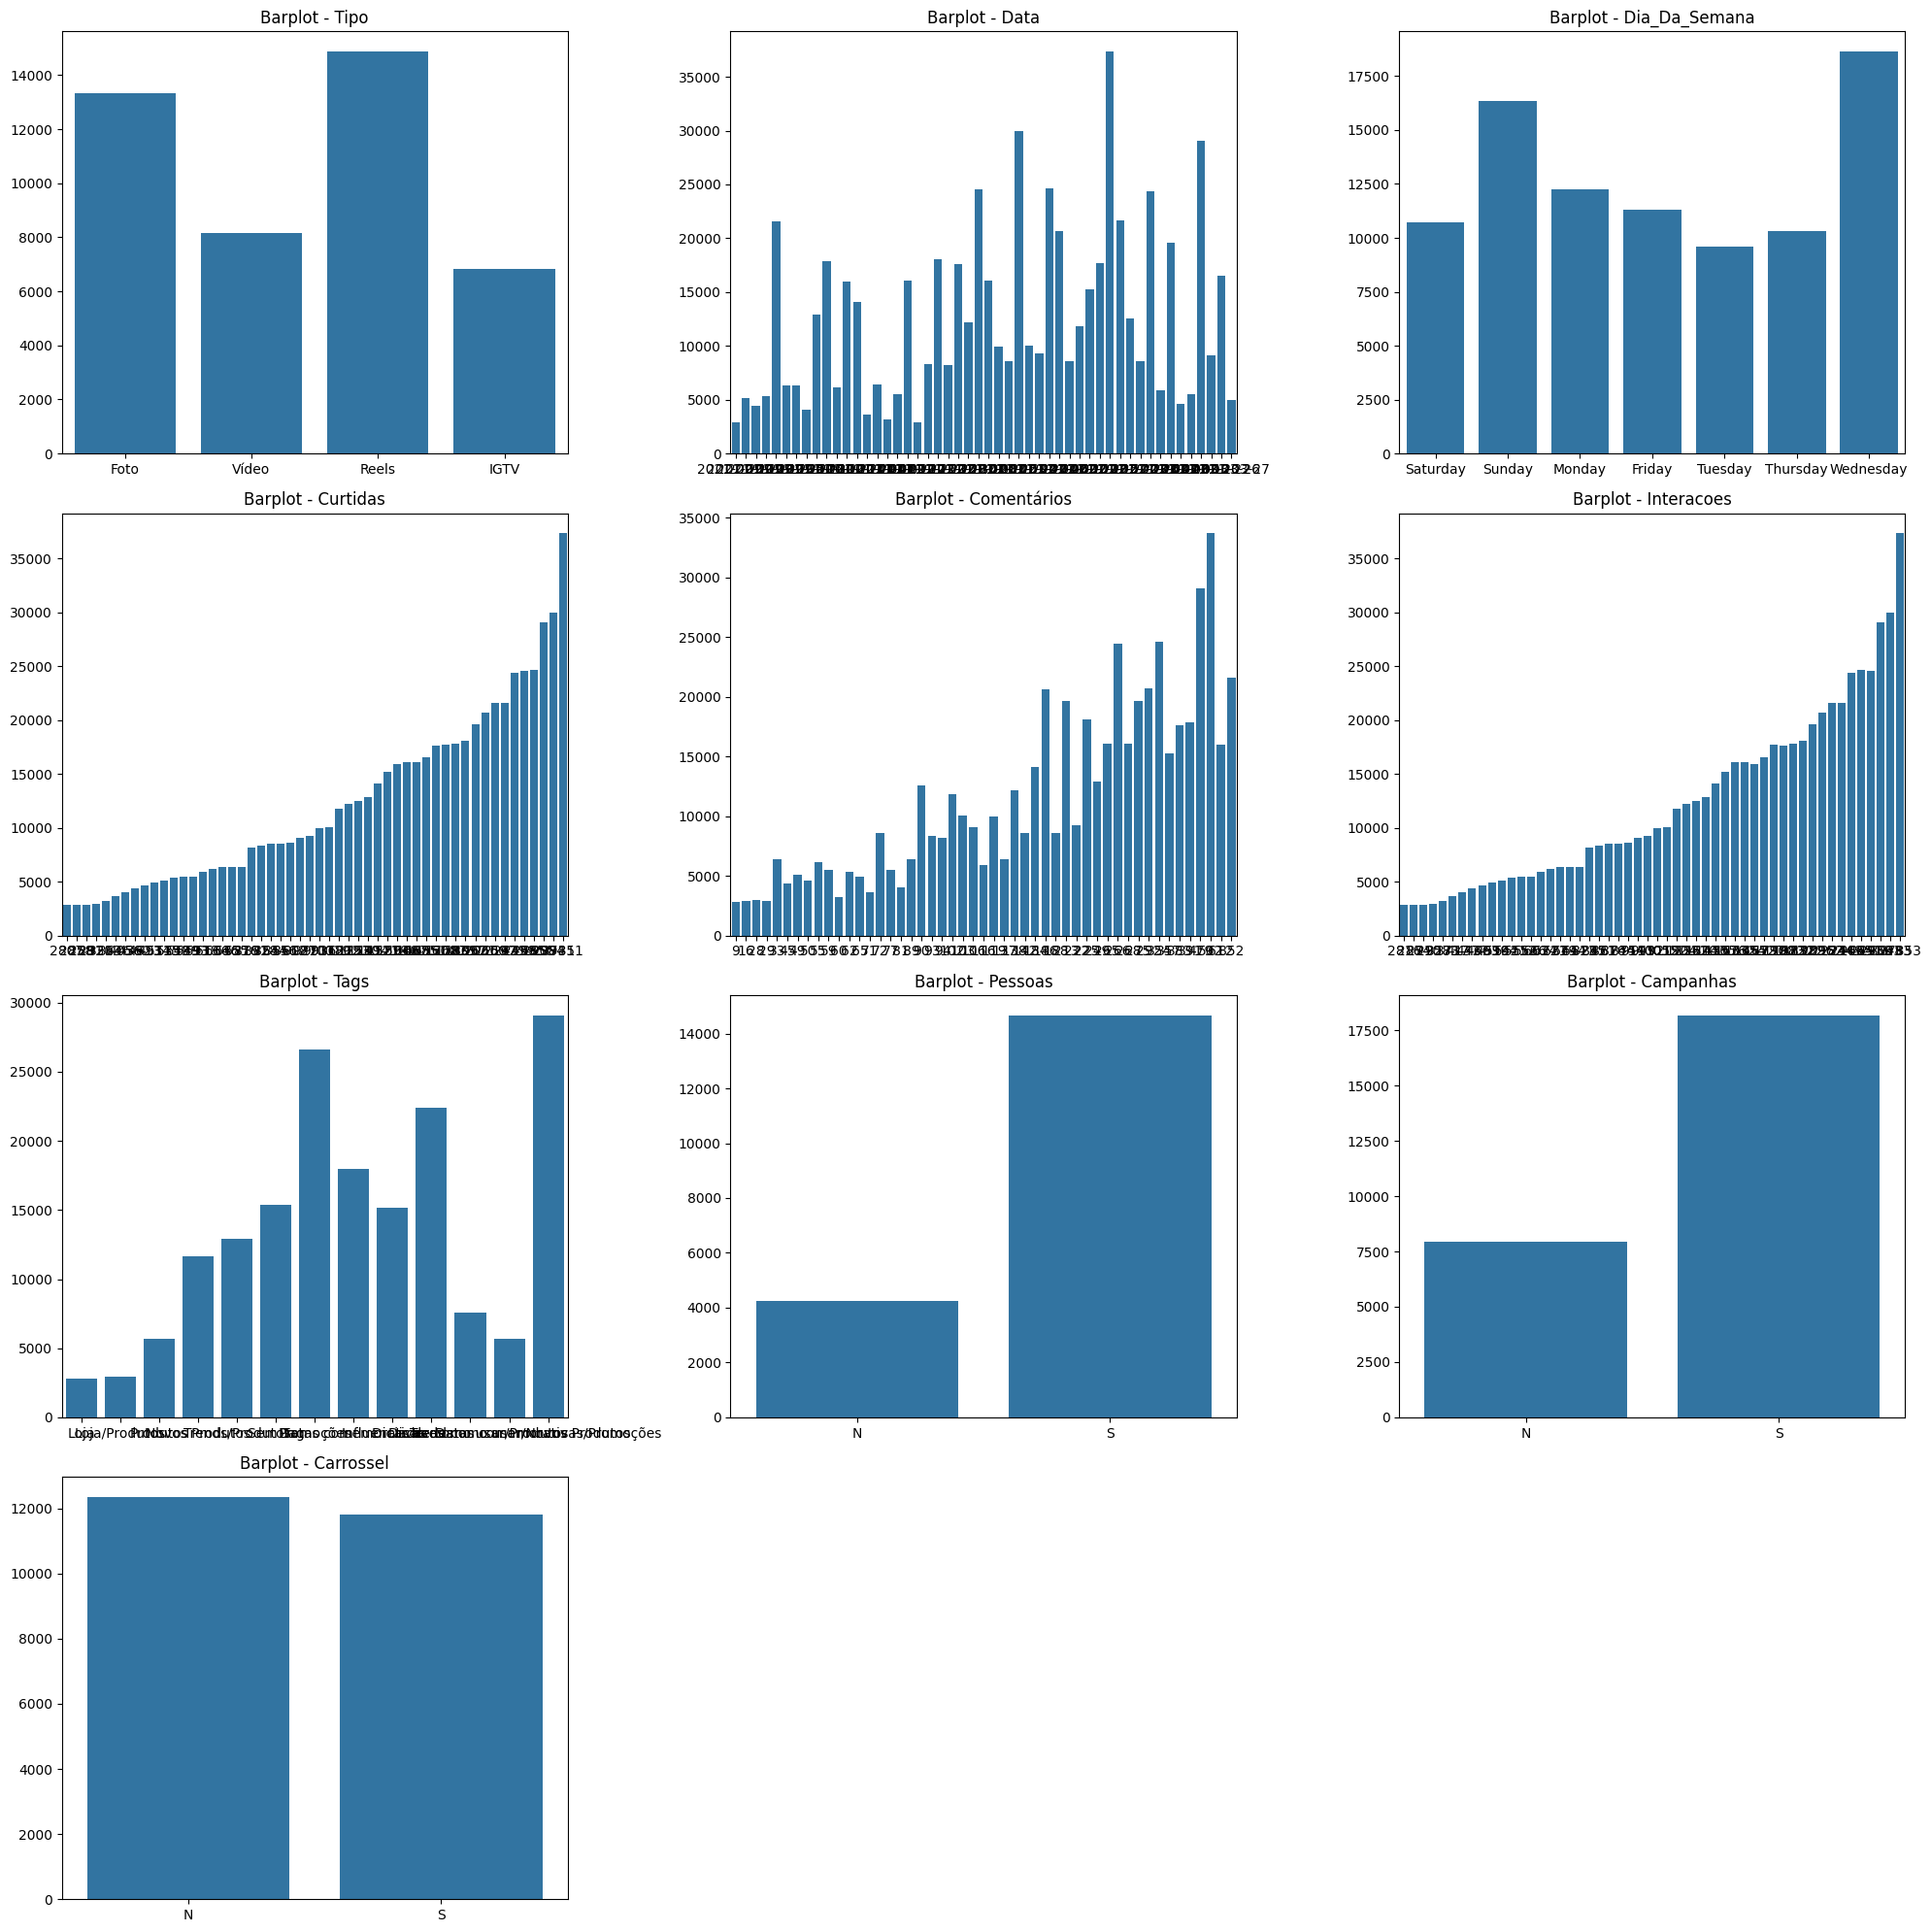

In [9]:
fn_charts.barplots(df, df.columns, hue_columns[0]) # Criando o barplot com base na lista de hue columns

### Listando os insights encontrados nos histplots

| Hue Column | Column                | Intensidade | Insight                                                                           |
|------------|-----------------------|-------------|-----------------------------------------------------------------------------------|
| cancelou   | idade                 | Evidente    | Quem cancelou, tende a ter mais de 50 anos (o contrário também)                   |
| cancelou   | total_gasto            | Evidente    | Quem cancelou, tende a ter gasto menos de 500,00 (o contrário também)             |
| cancelou   | duracao_contrato      | Evidente    | Quem cancelou, tende a ter um contrato mensal (o contrário também)                |
| cancelou   | ligacoes_callcenter   | Evidente    | Quem cancelou, tende a ligar mais de 5 vezes no callcenter (o contrário também)   |
| cancelou   | dias_atraso           | Evidente    | Quem cancelou, tende a ter mais de 20 dias de atraso no pagamento (o contrário também) |
| cancelou   | meses_ultima_interacao | Sutil       | Quem cancelou, tende a ficar mais de 15 meses sem interação (o contrário também)  |

### Armazenando as principais colunas dos insights de acordo com sua hue column

In [9]:
columns_cancelou = ['idade', 'total_gasto', 'ligacoes_callcenter', 'dias_atraso', 'meses_ultima_interacao']

### Corroborando os insights encontrados nos histplots através de boxplots

In [ ]:
fn_charts.boxplots(df, columns_cancelou, hue_columns[0]) # Criando os boxplots com base nas hue columns e nas principais colunas de insight

### Corroborando os insights encontrados nos histplots através de um heatmap

In [11]:
df_dummies = pd.get_dummies(df) # Criando uma variável com o dataset dummies, que transforma variáveis categóricas em numéricas
df_heatmap = df_dummies.corr() # Criando uma variável com o dataset com dados de 0 a 1 para ser usado em um heatmap

In [12]:
df_dummies.to_csv(consts.DATASET_DUMMIES, index=False) # Salvando o dataset dummies

In [ ]:
fn_charts.heatmap(df_heatmap) # Criando o heatmap

### Corroborando os insights encontrados nos histplots através de barplots e possivelmente gerando novos insights

In [14]:
df_heatmap_unstack = pd.DataFrame(df_heatmap.unstack()) # Fazendo o unstack do dataset do heatmap
df_heatmap_unstack = df_heatmap_unstack.rename(columns={0: 'correlation'}) # Alterando o nome da coluna de correlações

In [ ]:
for column in [hue_columns[i] for i in [0]]: # Criando uma estrutura de repetição para gerar os gráficos, apenas para colunas que não eram categóricas e foram substituídas por numéricas
    corr = df_heatmap_unstack.loc[column].sort_values(by='correlation')[:-1] # Filtrando e classificando o dataset apenas pela coluna hue
    fn_charts.barplot(corr, corr['correlation'], corr['correlation'].max(), column) # Criando o gráfico com o valor máximo na escala

### Identificando os grupos com base nas análises anteriores

Nessa análise exploratória inicial, após o detalhamento dos gráficos estatísticos acima, podemos identificar 2 grupos na tabela abaixo com base nos objetivos do projeto, de forma qualitativa e quantitativa. 

| **Grupo 1**        | **Grupo 1**           | **Grupo 2**       | **Grupo 2**          |
|-----------------------------------|---------------------------------------|-----------------------------------|--------------------------------------|
| **Qualitativo**         | **Quantitativo**           | **Qualitativo**         | **Quantitativo**           |
| Mais de 50 anos                    | Idade > 50                 | Menos de 50 anos                    | Idade <= 50                     |
| Gastou menos de 500,00             | Gastos < 500               | Gastou mais de 500,00               | Gastos >= 500                   |
| Possui um contrato mensal          | Contrato = Mensal          | Possui contratos anual e trimestral | Contrato != Mensal              |
| Já ligou mais de 5 vezes no callcenter | Ligações Callcenter > 5    | Já ligou menos de 5 vezes no callcenter | Ligações Callcenter <= 5         |
| Atrasa o pagamento em mais de 20 dias | Dias de Atraso > 20        | Não atrasa o pagamento em mais de 20 dias | Dias de Atraso <= 20           |
| Fica mais de 15 meses sem interação | Meses sem Interação > 15   | Fica menos de 15 meses sem interação | Meses sem Interação <= 15        |

### Listando as sugestões de melhorias

Com base nas conclusões encontradas acima, é possível sugerir as seguintes sugestões de melhoria:
1. Visando reduzir o índice de churn, uma boa sugestão é dar uma maior atenção para evitar os cenários dos clientes Grupo 1, como dar vantagens para quem assina os contratos anuais e trimestrais, fazer um trabalho especial com a equipe de callcenter para evitar que os clientes liguem mais de 5 vezes, fazer um plano de ação com ideias para que os clientes não fiquem com mais de 20 dias de atraso no pagamento, entre outras ações

### Estimando o impacto da aplicação das sugestões de melhorias

Mostrando a evolução antes e depois de aplicar as melhorias sugeridas:

In [ ]:
display(df['cancelou'].value_counts(normalize=True).map('{:.1%}'.format).sort_index()) # Verificando a porcentagem do índice de churn inicial

In [18]:
# Atualizando o dataframe conforme as sugestões apontadas  
df = df[df['idade']<=50]
df = df[df['total_gasto']>=500]
df = df[df['assinatura']!='Mensal']
df = df[df['ligacoes_callcenter']<=5]
df = df[df['dias_atraso']<=20]
df = df[df['meses_ultima_interacao']<=15]

In [ ]:
display(df['cancelou'].value_counts(normalize=True).map('{:.1%}'.format).sort_index()) # Verificando a porcentagem do índice de churn posteriormente

In [ ]:
df # Exibindo o dataset

### Conclusão

Após aplicar as sugestões de melhorias indicadas nessa análise exploratória do projeto, estimamos a evolução da coluna target (cancelou). 

Essa coluna cancelou corresponde a quantidade de clientes que cancelaram a assinatura com a empresa. 

Como resultado, inicialmente tínhamos um total de cancelamentos de clientes de **56,7%** e após a aplicação das sugestões apontadas o total de conversão foi para **8,0%**, representando assim uma **redução absoluta de 48,7%**.

O resultado encontrado foi excelente, onde **houve uma redução expressiva no índice de churn das assinaturas**. O único ponto de ressalva é que foram aplicadas condições para se chegar a esse resultado, deixando assim o número de clientes mais restrito. Dessa forma, é preciso discutir com a área de Negócios para estabelecer se esse resultado atende as necessidades da área ou é preciso fazer ajustes, como por exemplo reduzir o número de parâmetros para que a campanha possa atingir um número maior de clientes.